In [2]:
import numpy as np

import mne
from mne.datasets import sample
from mne.preprocessing import compute_proj_ecg, compute_proj_eog

# getting some data ready
data_path = sample.data_path()
raw_fname = data_path + '/MEG/sample/sample_audvis_filt-0-40_raw.fif'

raw = mne.io.read_raw_fif(raw_fname, preload=True)
raw.set_eeg_reference()
raw.pick_types(meg=True, ecg=True, eog=True, stim=True)

Opening raw data file C:\Users\rkm14\mne_data\MNE-sample-data/MEG/sample/sample_audvis_filt-0-40_raw.fif...
    Read a total of 4 projection items:
        PCA-v1 (1 x 102)  idle
        PCA-v2 (1 x 102)  idle
        PCA-v3 (1 x 102)  idle
        Average EEG reference (1 x 60)  idle
    Range : 6450 ... 48149 =     42.956 ...   320.665 secs
Ready.
Current compensation grade : 0
Reading 0 ... 41699  =      0.000 ...   277.709 secs...
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom EEG reference.
Removing existing average EEG reference projection.
Created an SSP operator (subspace dimension = 3)


<Raw  |  sample_audvis_filt-0-40_raw.fif, n_channels x n_times : 315 x 41700 (277.7 sec), ~103.7 MB, data loaded>

Including 3 SSP projectors from raw file
Running ECG SSP computation
Reconstructing ECG signal from Magnetometers
Setting up band-pass filter from 5 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 5.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 4.75 Hz)
- Upper passband edge: 35.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 35.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Number of ECG events detected : 285 (average pulse 61 / min.)
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hamming window
- Lower passband edge: 1.00
- Lower

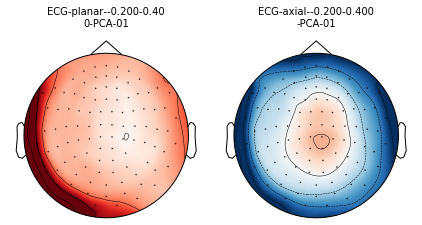

Including 3 SSP projectors from raw file
Running EOG SSP computation
EOG channel index for this subject is: [314]
Filtering the data to remove DC offset to help distinguish blinks from saccades
Setting up band-pass filter from 1 - 10 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-phase, non-causal bandpass filter:
- Windowed frequency-domain design (firwin2) method
- Hann window
- Lower passband edge: 1.00
- Lower transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 0.75 Hz)
- Upper passband edge: 10.00 Hz
- Upper transition bandwidth: 0.50 Hz (-12 dB cutoff frequency: 10.25 Hz)
- Filter length: 2048 samples (13.639 sec)

Now detecting blinks and generating corresponding events
Found 46 significant peaks
Number of EOG events detected : 46
Computing projector
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 35 Hz

FIR filter parameters
---------------------
Designing a two-pass forward and reverse, zero-ph

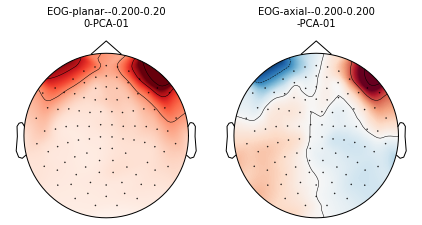

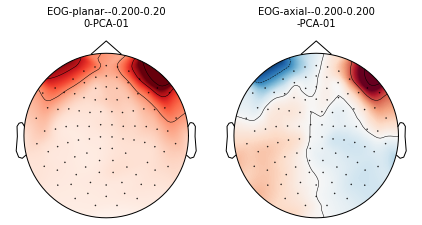

In [4]:
projs, events = compute_proj_ecg(raw, n_grad=1, n_mag=1, average=True)
print(projs)

ecg_projs = projs[-2:]
mne.viz.plot_projs_topomap(ecg_projs)

# Now for EOG

projs, events = compute_proj_eog(raw, n_grad=1, n_mag=1, average=True)
print(projs)   # SSP투영을 계산하는 함수 compute_proj_eog

eog_projs = projs[-2:]
mne.viz.plot_projs_topomap(eog_projs)

In [5]:
# MNE는 정보수준에서 투영을 처리하므로 'proj' 필드에서 찾은 목록을 채우려면 등록
raw.info['projs'] += eog_projs + ecg_projs

### SSP 정리 시연

319 events found
Event IDs: [ 1  2  3  4  5 32]
72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 7)
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061'

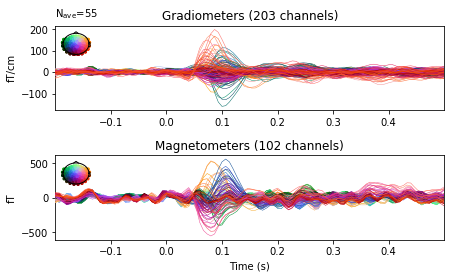

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Created an SSP operator (subspace dimension = 7)
7 projection items activated
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


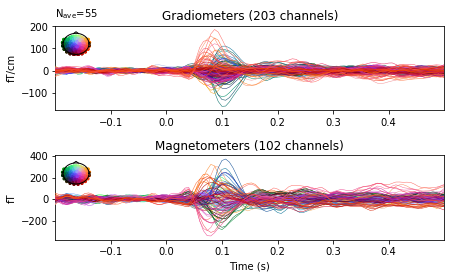

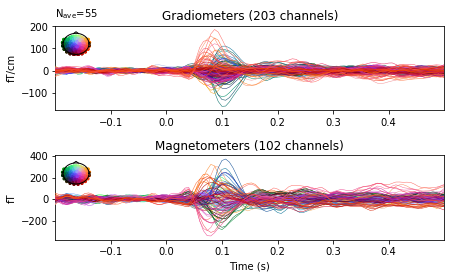

In [6]:
events = mne.find_events(raw, stim_channel='STI 014')
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)
# 이것은 정보 의존적 일 수 있습니다.
event_id = {'auditory/left': 1}

epochs_no_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                            proj=False, baseline=(None, 0), reject=reject)
epochs_no_proj.average().plot(spatial_colors=True)


epochs_proj = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5, proj=True,
                         baseline=(None, 0), reject=reject)
epochs_proj.average().plot(spatial_colors=True)

- 이 방법은 얼마나 많은 요소를 사용할지가 분명치 않으며 불행히도 보여진 ssp 모드를 사용함으로 보여지는 나쁜결과를 가져올 수 있습니다. 

72 matching events found
Applying baseline correction (mode: mean)
Not setting metadata
Entering delayed SSP mode.
Created an SSP operator (subspace dimension = 7)
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on MAG : ['MEG 1711']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']
    Rejecting  epoch based on EOG : ['EOG 061']


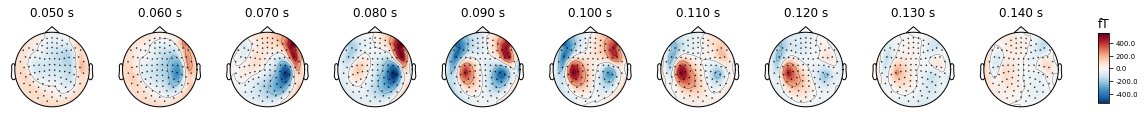

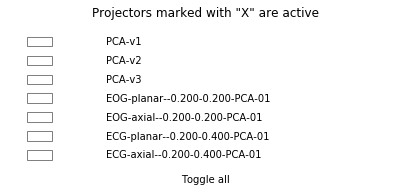

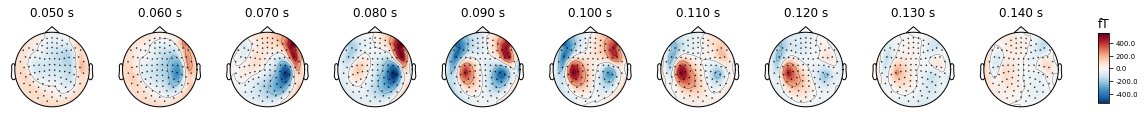

In [7]:
evoked = mne.Epochs(raw, events, event_id, tmin=-0.2, tmax=0.5,
                    proj='delayed', baseline=(None, 0),
                    reject=reject).average()

# 초로 순간을 설정합니다. (10ms단위로 50에서 150까지)
times = np.arange(0.05, 0.15, 0.01)

evoked.plot_topomap(times, proj='interactive')